In [1]:
import piplite

await piplite.install(['nbformat', 'plotly'])

In [2]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"

In [3]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

path = URL

await download(path, "dataset2.csv")

In [4]:
import pandas as pd
file_name="dataset2.csv"
# Read the CSV file into a Pandas data frame
df = pd.read_csv(file_name)

# Display the data frame
df.head()

<ipython-input-4-69dd240f508c>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [6]:
# Generate the statistical description of all features, including "object" data types
description = df.describe(include='all')
description

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
count,238.000000,238.000000,238,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238,238.000000,238.000000
unique,NaN,NaN,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
top,NaN,NaN,Dell,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,NaN,NaN
freq,NaN,NaN,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160,NaN,NaN
mean,118.500000,118.500000,NaN,3.205882,2.151261,1.058824,5.630252,14.688655,0.813822,7.882353,245.781513,4.106221,1462.344538,NaN,0.676471,0.323529
std,68.848868,68.848868,NaN,0.776533,0.638282,0.235790,1.241787,1.166045,0.141860,2.482603,34.765316,1.078442,574.607699,NaN,0.468809,0.468809
min,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,3.000000,12.000000,0.413793,4.000000,128.000000,1.786050,527.000000,NaN,0.000000,0.000000
25%,59.250000,59.250000,NaN,3.000000,2.000000,1.000000,5.000000,14.000000,0.689655,8.000000,256.000000,3.246863,1066.500000,NaN,0.000000,0.000000
50%,118.500000,118.500000,NaN,3.000000,2.000000,1.000000,5.000000,15.000000,0.862069,8.000000,256.000000,4.106221,1333.000000,NaN,1.000000,0.000000
75%,177.750000,177.750000,NaN,4.000000,3.000000,1.000000,7.000000,15.600000,0.931034,8.000000,256.000000,4.851000,1777.000000,NaN,1.000000,1.000000


In [19]:
await piplite.install(['seaborn','numpy','scipy'])

In [22]:

import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

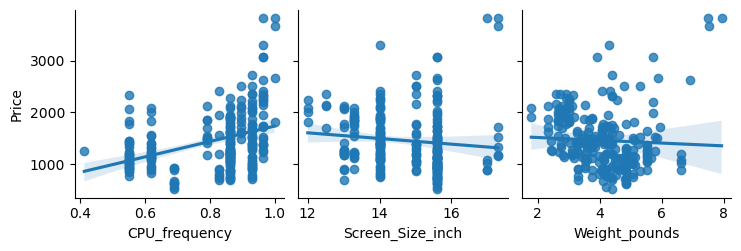

In [13]:
# Step 2: Create regression plots for the specified attributes against "Price"
sns.pairplot(df, x_vars=["CPU_frequency", "Screen_Size_inch", "Weight_pounds"], y_vars=["Price"], kind='reg')
plt.show()

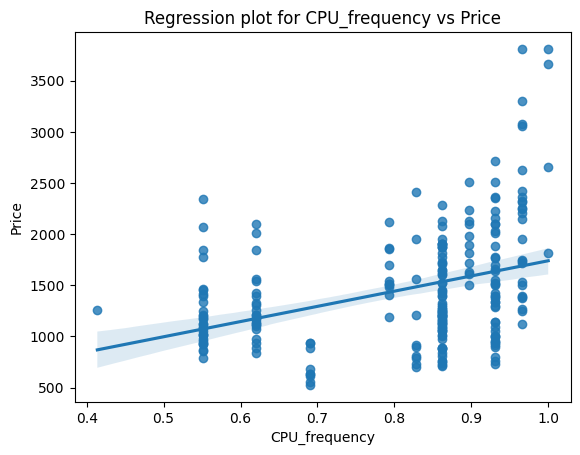

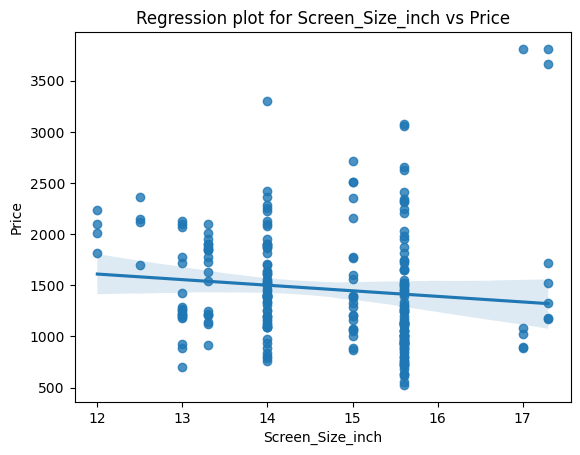

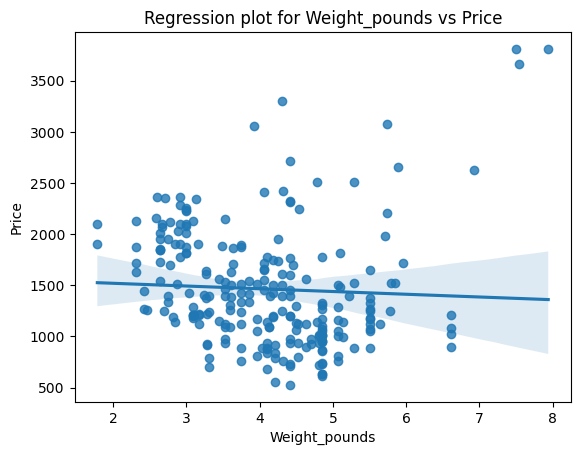

In [15]:
regression_attributes = ['CPU_frequency', 'Screen_Size_inch', 'Weight_pounds']
for attribute in regression_attributes:
    sns.regplot(x=attribute, y='Price', data=df)
    plt.title(f'Regression plot for {attribute} vs Price')
    plt.xlabel(attribute)
    plt.ylabel('Price')
    plt.show()

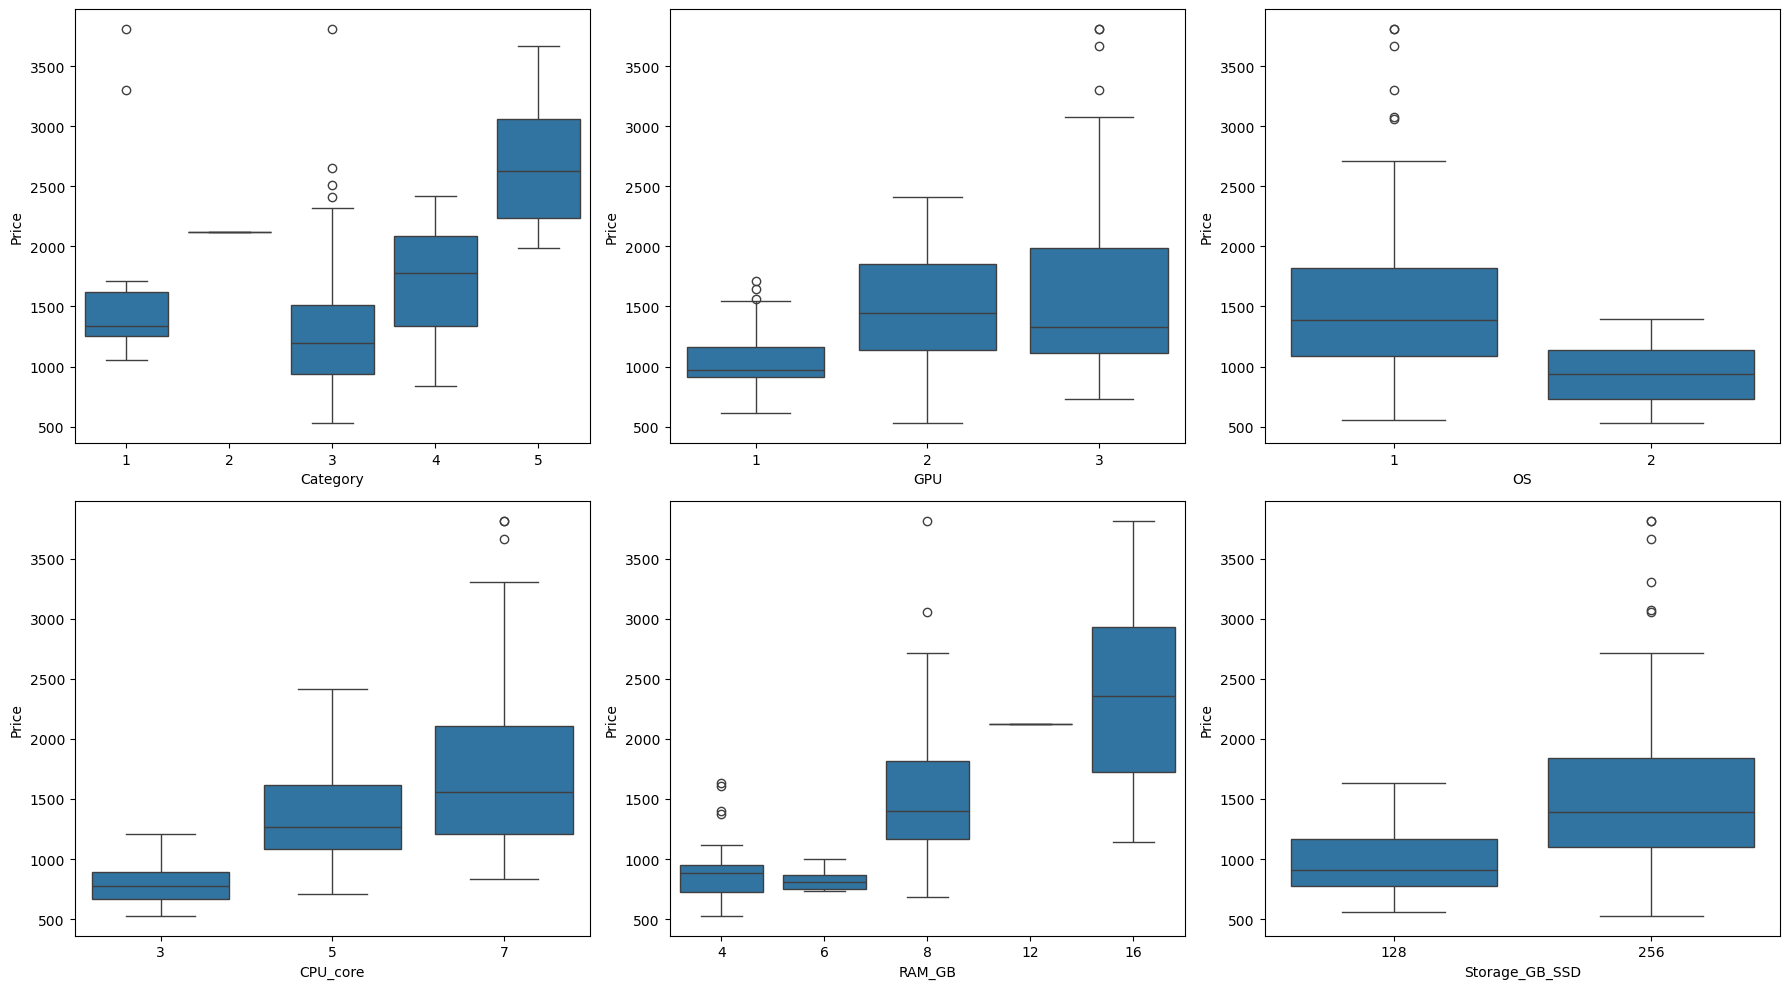

In [16]:
# Step 3: Create box plots for the specified attributes against "Price"
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
sns.boxplot(x="Category", y="Price", data=df, ax=axes[0, 0])
sns.boxplot(x="GPU", y="Price", data=df, ax=axes[0, 1])
sns.boxplot(x="OS", y="Price", data=df, ax=axes[0, 2])
sns.boxplot(x="CPU_core", y="Price", data=df, ax=axes[1, 0])
sns.boxplot(x="RAM_GB", y="Price", data=df, ax=axes[1, 1])
sns.boxplot(x="Storage_GB_SSD", y="Price", data=df, ax=axes[1, 2])
plt.tight_layout()
plt.show()

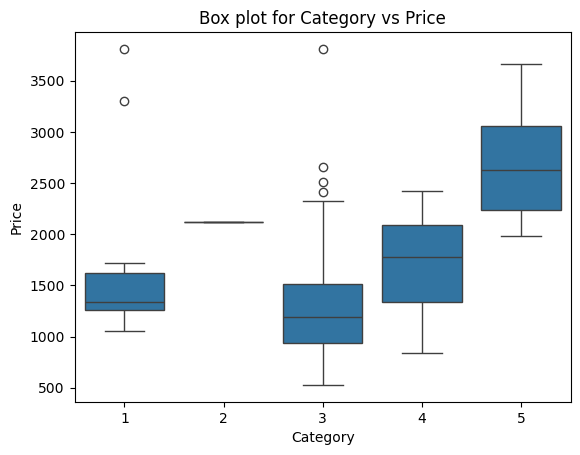

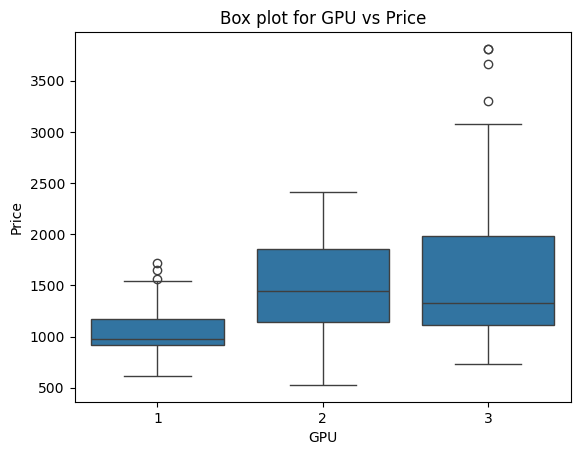

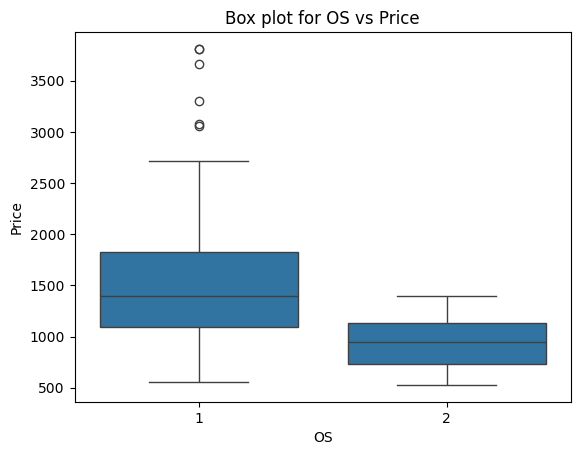

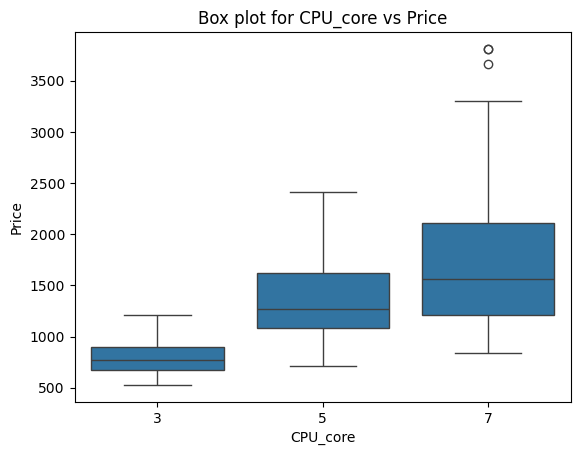

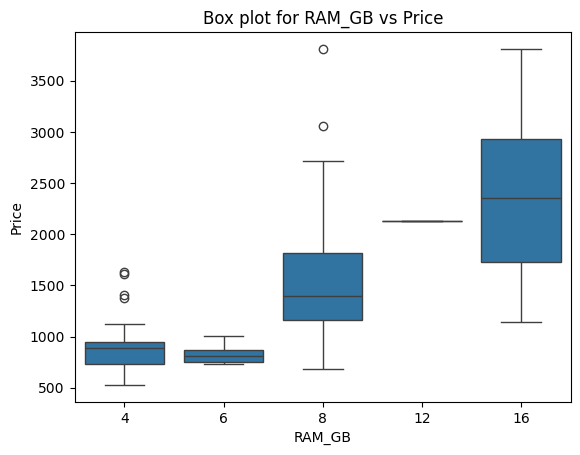

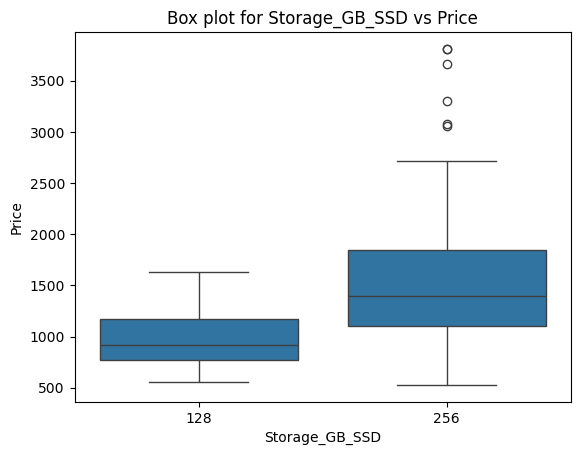

In [18]:
# 2. Create box plots
boxplot_attributes = ['Category', 'GPU', 'OS', 'CPU_core', 'RAM_GB', 'Storage_GB_SSD']
for attribute in boxplot_attributes:
    sns.boxplot(x=attribute, y='Price', data=df)
    plt.title(f'Box plot for {attribute} vs Price')
    plt.xlabel(attribute)
    plt.ylabel('Price')
    plt.show()

In [24]:
# Step 2: Evaluate correlation, pearson coefficient, and p-values for numerical attributes against the target attribute "Price"
numerical_attributes = df.select_dtypes(include=[np.number]).columns
correlation_data = []

for attribute in numerical_attributes:
    if attribute != 'Price':
        correlation, p_value = stats.pearsonr(df[attribute], df['Price'])
        correlation_data.append([attribute, correlation, p_value])

correlation_df = pd.DataFrame(correlation_data, columns=['Attribute', 'Correlation', 'P-Value'])

correlation_df

,Attribute,Correlation,P-Value
0,Unnamed: 0.1,0.321933,3.851058e-07
1,Unnamed: 0,0.321933,3.851058e-07
2,Category,0.286243,7.225696e-06
3,GPU,0.288298,6.166950e-06
4,OS,-0.221730,5.696643e-04
5,CPU_core,0.459398,7.912950e-14
6,Screen_Size_inch,-0.110644,8.853398e-02
7,CPU_frequency,0.366666,5.502463e-09
8,RAM_GB,0.549297,3.681561e-20
9,Storage_GB_SSD,0.243421,1.489892e-04


In [26]:
# Select numerical attributes
numerical_attributes = df.select_dtypes(include=np.number)
# Calculate correlation values for all numerical attributes against 'Price'
correlation_values = numerical_attributes.corr()['Price'].drop('Price')
# Calculate Pearson coefficient and p-values for all numerical attributes against 'Price'
pearson_coefficients = []
p_values = []
for column in numerical_attributes.columns:
    if column != 'Price':
        pearson_coefficient, p_value = stats.pearsonr(numerical_attributes[column], df['Price'])
        pearson_coefficients.append(pearson_coefficient)
        p_values.append(p_value)
# Create a new dataframe to store the results
results_df = pd.DataFrame({'Attribute': correlation_values.index, 'Correlation Value': correlation_values, 'Pearson Coefficient': pearson_coefficients, 'P-value': p_values})
# Print the results
results_df

,Attribute,Correlation Value,Pearson Coefficient,P-value
Unnamed: 0.1,Unnamed: 0.1,0.321933,0.321933,3.851058e-07
Unnamed: 0,Unnamed: 0,0.321933,0.321933,3.851058e-07
Category,Category,0.286243,0.286243,7.225696e-06
GPU,GPU,0.288298,0.288298,6.166950e-06
OS,OS,-0.221730,-0.221730,5.696643e-04
CPU_core,CPU_core,0.459398,0.459398,7.912950e-14
Screen_Size_inch,Screen_Size_inch,-0.110644,-0.110644,8.853398e-02
CPU_frequency,CPU_frequency,0.366666,0.366666,5.502463e-09
RAM_GB,RAM_GB,0.549297,0.549297,3.681561e-20
Storage_GB_SSD,Storage_GB_SSD,0.243421,0.243421,1.489892e-04


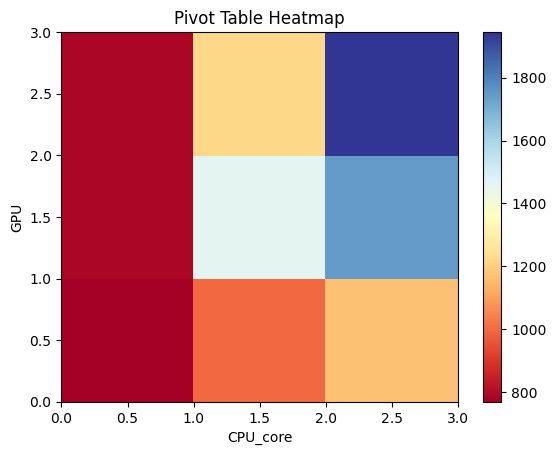

In [27]:
# Step 1: Group the attributes "GPU", "CPU_core", and "Price" in the DataFrame df
grouped_data = df.groupby(['GPU', 'CPU_core'])['Price'].mean().reset_index()

# Step 2: Create a pivot table for the grouped data with 'Price' as the target variable and mean as the aggregation function
pivot_table = grouped_data.pivot(index='GPU', columns='CPU_core', values='Price')

# Step 3: Plot a pcolor plot for the pivot table
plt.pcolor(pivot_table, cmap='RdYlBu')
plt.colorbar()
plt.xlabel('CPU_core')
plt.ylabel('GPU')
plt.title('Pivot Table Heatmap')
plt.show()

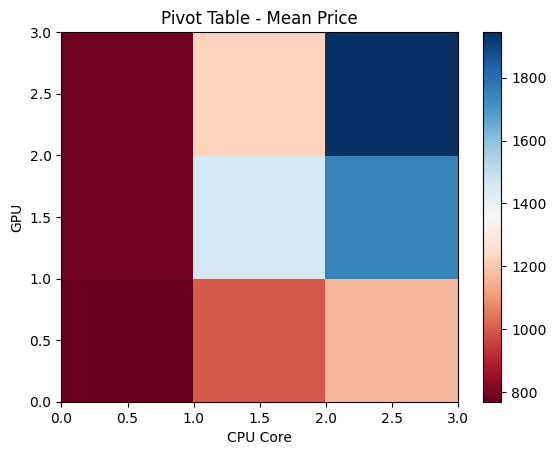

In [28]:
# Group the attributes
grouped_data = df.groupby(['GPU', 'CPU_core'])['Price'].mean() #no cumple ninguna funcion en este codigo 
# Create a pivot table
pivot_table = pd.pivot_table(df, values='Price', index='GPU', columns='CPU_core', aggfunc='mean')
# Plot a pcolor plot
plt.pcolor(pivot_table, cmap='RdBu')
plt.colorbar()
plt.title('Pivot Table - Mean Price')
plt.xlabel('CPU Core')
plt.ylabel('GPU')
plt.show()